In [754]:
import pandas as pd
import numpy as np

In [755]:
df = pd.read_csv('city.csv', index_col='city')
df

,総人口,人口増加率（2015～20年）,65歳以上人口比率,可住地面積1km^2当たり人口密度,一人当たり歳出額,小学校1校当たり児童数,中学校1校当たり生徒数,完全失業率,第１次産業就業率,第２次産業就業率,第３次産業就業率,人口10万人当たり公民館＋図書館数,人口10万人当たり大型小売店数
city,,,,,,,,,,,,,
室蘭市（北海道）,82383.0000,-6.9791,36.8158,1898.2258,549.6836,331.2000,212.5000,4.0043,0.9328,26.3582,71.0851,100000.0000,13.3523
夕張市（北海道）,7334.0000,-17.0643,52.1953,65.6874,1464.7281,187.0000,100.0000,6.9781,16.7909,21.9773,60.9400,100000.0000,0.0000
岩見沢市（北海道）,79306.0000,-6.1456,36.4159,249.1471,601.7113,248.7857,206.8889,3.9154,7.9160,17.6649,71.4613,200000.0000,12.6094
網走市（北海道）,35759.0000,-8.4909,31.4858,165.5969,641.3968,181.2222,136.8333,2.9199,13.1256,15.2784,68.4566,100000.0000,13.9825
留萌市（北海道）,20114.0000,-9.4820,36.9146,386.6590,666.8205,157.6000,225.0000,4.0004,3.2809,19.7479,76.4920,200000.0000,14.9150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
久米島町（沖縄県）,7192.0000,-7.2598,29.8248,180.2055,1111.7282,76.8333,108.0000,4.3354,24.2090,14.1655,60.0581,100000.0000,0.0000
八重瀬町（沖縄県）,30941.0000,6.4508,22.3813,1239.6234,451.2678,629.5000,485.5000,4.8755,7.6319,15.9603,74.0293,100000.0000,9.6959
多良間村（沖縄県）,1058.0000,-11.3903,30.5293,66.5828,2425.7892,84.0000,29.0000,3.2051,42.2886,13.9303,43.2836,100000.0000,0.0000


In [756]:
C = df.index.values
C

array(['室蘭市（北海道）', '夕張市（北海道）', '岩見沢市（北海道）', ..., '多良間村（沖縄県）', '竹富町（沖縄県）',
       '与那国町（沖縄県）'], dtype=object)

In [757]:
F = df.columns.values
F

array(['総人口', '人口増加率（2015～20年）', '65歳以上人口比率', '可住地面積1km^2当たり人口密度',
       '一人当たり歳出額', '小学校1校当たり児童数', '中学校1校当たり生徒数', '完全失業率', '第１次産業就業率',
       '第２次産業就業率', '第３次産業就業率', '人口10万人当たり公民館＋図書館数', '人口10万人当たり大型小売店数'],
      dtype=object)

In [758]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
val_sc = sc.fit_transform(df)
val_sc

array([[ 2.35957047, -0.16371757,  0.07951974, ...,  1.10862755,
        -0.61250387,  0.51946321],
       [-0.7486389 , -1.28515121,  2.10863468, ..., -0.03614339,
        -0.61250387, -1.02099848],
       [ 2.23213426, -0.07103595,  0.02675281, ...,  1.15107403,
        -0.51994574,  0.43375624],
       ...,
       [-1.00856405, -0.65421927, -0.74990932, ..., -2.02849297,
        -0.61250387, -1.02099848],
       [-0.88912107,  0.45658109, -1.74885963, ...,  1.55912141,
        -0.70506199, -1.02099848],
       [-0.98296912, -0.39524728, -1.94388592, ...,  1.32309607,
        -0.61250387, -1.02099848]])

In [759]:
val_sc.shape

(1451, 13)

In [760]:
from sklearn.decomposition import PCA

pca = PCA()
val_PCA = pca.fit_transform(val_sc)

In [761]:
df_PCA = pd.DataFrame(pca.components_, index=F, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
総人口,0.3324,0.2002,-0.3391,0.3130,-0.2988,0.3840,0.3848,0.0805,-0.3406,0.1740,0.1941,0.0490,0.2423
人口増加率（2015～20年）,-0.0757,0.1417,-0.0621,0.2740,0.2656,0.0600,-0.0554,-0.1007,0.0009,-0.6087,0.5582,-0.3525,-0.0377
65歳以上人口比率,-0.0103,0.3392,-0.3514,0.0502,0.1681,0.1567,0.1447,-0.6327,0.3084,0.0346,-0.3953,-0.1199,-0.1339
可住地面積1km^2当たり人口密度,0.3316,-0.0511,0.0130,-0.0285,0.0087,-0.1173,-0.0633,-0.3184,0.1265,-0.3323,0.1505,0.7637,0.1869
一人当たり歳出額,-0.0246,0.5767,0.0048,-0.1069,0.3463,-0.1927,-0.1618,0.0144,-0.4184,0.2982,0.2032,0.2435,-0.3277


In [762]:
ratio = pca.explained_variance_ratio_
cum_ratio = []
s = 0
for i in (ratio):
    s += i
    cum_ratio.append(s)
df_cum_ratio = pd.DataFrame(cum_ratio, index = [f'PC{i+1}' for i in range(pca.n_components_)], columns=['累積寄与率']).T
df_cum_ratio

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
累積寄与率,0.3759,0.4954,0.6013,0.6830,0.7485,0.8087,0.8614,0.8971,0.9313,0.9634,0.9841,0.9994,1.0000


In [763]:
df_PCA = df_PCA.append(df_cum_ratio)
df_PCA.tail()

C:\Users\Takumu\AppData\Local\Temp\ipykernel_7092\3576223067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_PCA = df_PCA.append(df_cum_ratio)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
第２次産業就業率,-0.5900,0.1537,0.4141,0.5416,-0.0850,0.1366,-0.0033,-0.1354,-0.0131,0.0909,-0.0676,0.2482,0.2114
第３次産業就業率,-0.2218,-0.0752,-0.6386,0.2675,-0.2988,-0.2791,-0.5378,0.0578,-0.0170,0.0241,-0.0139,0.0704,-0.0085
人口10万人当たり公民館＋図書館数,0.0717,-0.0065,0.0729,-0.1888,0.0165,0.7612,-0.6095,-0.0212,-0.0164,0.0259,0.0065,0.0330,-0.0113
人口10万人当たり大型小売店数,-0.0141,-0.0062,0.0033,-0.0077,0.0207,0.0066,-0.0016,0.0212,-0.6319,-0.5238,-0.5702,0.0057,-0.0069
累積寄与率,0.3759,0.4954,0.6013,0.6830,0.7485,0.8087,0.8614,0.8971,0.9313,0.9634,0.9841,0.9994,1.0000


In [764]:
def color_background1(val):
    if val >= 0.2:
        color = 'red'
    elif val <= -0.2:
        color = 'blue'
    elif (val >= 0.15) & (val < 0.2):
        color = 'salmon'
    elif (val <= -0.15) & (val > -0.2):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

In [765]:
my_df = df_PCA.iloc[:, :4]
my_df.style.applymap(color_background1) 

,PC1,PC2,PC3,PC4
総人口,0.332371,0.200225,-0.339134,0.313021
人口増加率（2015～20年）,-0.075710,0.141721,-0.062079,0.274015
65歳以上人口比率,-0.010334,0.339193,-0.351396,0.050223
可住地面積1km^2当たり人口密度,0.331614,-0.051130,0.013027,-0.028535
一人当たり歳出額,-0.024560,0.576749,0.004756,-0.106945
小学校1校当たり児童数,-0.159254,0.466226,-0.080846,-0.400041
中学校1校当たり生徒数,0.035199,0.400228,0.010831,0.087235
完全失業率,0.236840,-0.116610,-0.110459,0.401201
第１次産業就業率,0.536477,0.262711,0.392503,0.288078
第２次産業就業率,-0.589977,0.153668,0.414089,0.541570


In [766]:
pd.options.display.float_format = '{:.4f}'.format
pca_score = pd.DataFrame(val_PCA, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)
df_score = pca_score.iloc[:, :4]
df_score

,PC1,PC2,PC3,PC4
室蘭市（北海道）,2.2274,0.6442,-1.1396,0.0833
夕張市（北海道）,-2.2733,0.0110,-2.8204,-1.5606
岩見沢市（北海道）,1.1026,0.9377,-1.0247,0.6728
網走市（北海道）,-0.0426,1.1758,-0.1666,0.5130
留萌市（北海道）,0.3874,1.2238,-1.6478,-0.0900
...,...,...,...,...
久米島町（沖縄県）,-1.7599,0.9494,0.0948,-0.4429
八重瀬町（沖縄県）,3.3385,1.8763,0.1716,-0.8165
多良間村（沖縄県）,-3.8316,0.4929,2.1082,-0.1872
竹富町（沖縄県）,-1.7687,3.1080,1.1216,0.6949


In [767]:
my_score = df_score.values
my_score.shape

(1451, 4)

In [768]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(my_score)
labels

array([5, 6, 2, ..., 3, 2, 2], dtype=int64)

In [769]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([374, 147, 145, 240, 134, 142, 113, 156], dtype=int64))

In [770]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


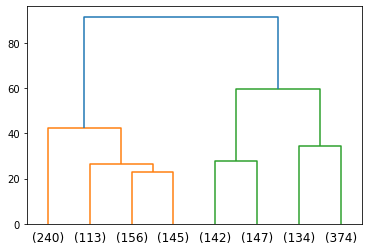

In [771]:
model = AgglomerativeClustering(affinity='euclidean', 
                                linkage='ward', 
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(my_score)
plot_dendrogram(model, truncate_mode='lastp', p=8)

In [772]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []

for i in range(1451):
    if labels[i] == 0:
        group1.append(C[i])
    elif labels[i] == 1:
        group2.append(C[i])
    elif labels[i] == 2:
        group3.append(C[i])
    elif labels[i] == 3:
        group4.append(C[i])
    elif labels[i] == 4:
        group5.append(C[i])
    elif labels[i] == 5:
        group6.append(C[i])
    elif labels[i] == 6:
        group7.append(C[i])
    else:
        group8.append(C[i])

In [773]:
df_group1 = df_score.loc[group1, :]
df_group1

,PC1,PC2,PC3,PC4
稚内市（北海道）,-0.0244,0.6740,-1.1087,-0.1414
美唄市（北海道）,-0.9481,0.3210,-0.7282,-0.0596
砂川市（北海道）,0.0974,0.5983,-1.7807,-0.4344
岩内町（北海道）,0.1880,-0.0887,-0.9966,-1.1640
余市町（北海道）,-0.3484,0.8984,-1.5355,0.0732
...,...,...,...,...
日置市（鹿児島県）,0.6248,0.2721,-0.6916,0.4327
いちき串木野市（鹿児島県）,0.0762,-0.0375,-1.3064,-0.6619
南さつま市（鹿児島県）,-0.1305,-0.2070,-1.5643,1.7065
さつま町（鹿児島県）,-0.2962,-1.2034,0.5361,-0.5338


In [774]:
df_group2 = df_score.loc[group2, :]
df_group2

,PC1,PC2,PC3,PC4
名取市（宮城県）,4.2544,0.8340,0.2027,1.0411
多賀城市（宮城県）,4.1387,2.0076,0.2905,0.2968
岩沼市（宮城県）,2.9856,0.5499,0.4662,-0.2585
富谷市（宮城県）,3.7062,1.1639,0.4827,0.3809
楢葉町（福島県）,4.0091,5.6864,11.0976,-2.3755
...,...,...,...,...
中城村（沖縄県）,3.4553,2.2802,0.9521,-0.6731
西原町（沖縄県）,4.0806,2.2089,0.0190,-0.4211
与那原町（沖縄県）,5.3269,3.2269,0.5975,-0.7632
南風原町（沖縄県）,5.5806,3.0032,0.5579,-0.1708


In [775]:
df_group3 = df_score.loc[group3, :]
df_group3

,PC1,PC2,PC3,PC4
岩見沢市（北海道）,1.1026,0.9377,-1.0247,0.6728
網走市（北海道）,-0.0426,1.1758,-0.1666,0.5130
留萌市（北海道）,0.3874,1.2238,-1.6478,-0.0900
名寄市（北海道）,0.1713,1.5112,-0.2486,2.4487
滝川市（北海道）,1.1753,1.4262,-0.5442,0.5918
...,...,...,...,...
渡嘉敷村（沖縄県）,-0.7746,4.3116,-0.5079,0.5639
座間味村（沖縄県）,-1.2733,4.7609,0.8745,0.9037
久米島町（沖縄県）,-1.7599,0.9494,0.0948,-0.4429
竹富町（沖縄県）,-1.7687,3.1080,1.1216,0.6949


In [776]:
df_group4 = df_score.loc[group4, :]
df_group4

,PC1,PC2,PC3,PC4
新篠津村（北海道）,-3.4755,0.7541,2.2636,0.3939
知内町（北海道）,-2.6594,-0.9246,0.8813,-0.7491
鹿部町（北海道）,-2.5707,-1.2537,1.0335,-0.9784
長万部町（北海道）,-2.2484,-0.4045,0.5119,-0.5666
厚沢部町（北海道）,-3.1787,0.0588,0.3341,-0.4101
...,...,...,...,...
渡名喜村（沖縄県）,-3.6215,1.4479,-0.1681,-0.4261
南大東村（沖縄県）,-4.1204,0.9466,3.9941,-0.5890
北大東村（沖縄県）,-3.1252,0.6864,3.7936,-0.3821
伊平屋村（沖縄県）,-3.3230,1.5912,0.9475,-0.7226


In [777]:
df_group5 = df_score.loc[group5, :]
df_group5

,PC1,PC2,PC3,PC4
花巻市（岩手県）,1.4647,-0.5040,-0.0024,0.8664
北上市（岩手県）,2.3522,-1.2869,0.8968,0.0647
登米市（宮城県）,0.3933,-1.4641,-0.0435,1.2134
栗原市（宮城県）,0.2617,-1.3411,-0.1272,1.5459
大和町（宮城県）,2.1415,-1.8516,0.3072,1.6690
...,...,...,...,...
あさぎり町（熊本県）,-0.4691,-2.1412,0.3491,3.4056
中津市（大分県）,1.9159,-1.6636,-0.0387,1.8252
佐伯市（大分県）,0.3039,-1.3672,-1.7132,2.7592
宇佐市（大分県）,0.2135,-1.8031,-0.8232,1.9642


In [778]:
df_group6 = df_score.loc[group6, :]
df_group6

,PC1,PC2,PC3,PC4
室蘭市（北海道）,2.2274,0.6442,-1.1396,0.0833
千歳市（北海道）,3.1048,1.0742,-0.1002,1.9110
登別市（北海道）,1.3962,0.7145,-1.3337,0.1535
恵庭市（北海道）,3.1335,1.0230,-0.4098,0.2740
北広島市（北海道）,2.0414,1.4632,-1.1812,0.9201
...,...,...,...,...
糸満市（沖縄県）,2.9514,1.6804,-0.3935,-0.0434
南城市（沖縄県）,2.0541,1.4429,-0.5113,-0.0353
金武町（沖縄県）,1.0053,1.3336,-1.0923,-0.4360
嘉手納町（沖縄県）,2.8367,1.7400,-1.1922,-0.8056


In [779]:
df_group7 = df_score.loc[group7, :]
df_group7

,PC1,PC2,PC3,PC4
夕張市（北海道）,-2.2733,0.0110,-2.8204,-1.5606
芦別市（北海道）,-1.2163,-0.3610,-2.0242,-1.1249
赤平市（北海道）,-0.9082,0.1222,-2.3521,-0.7751
三笠市（北海道）,-1.1979,0.7243,-3.6365,-1.2064
歌志内市（北海道）,-1.9921,0.5482,-3.3373,-1.2822
...,...,...,...,...
伊仙町（鹿児島県）,-2.4271,0.7841,-0.4227,-0.4174
国頭村（沖縄県）,-1.5540,0.8141,-2.4691,-0.3546
大宜味村（沖縄県）,-1.8614,1.0765,-0.8869,-1.1731
粟国村（沖縄県）,-2.1510,1.8683,-2.2379,-1.1027


In [780]:
df_group8 = df_score.loc[group8, :]
df_group8

,PC1,PC2,PC3,PC4
紋別市（北海道）,-0.6658,0.3558,-0.2404,-0.0674
士別市（北海道）,-1.3242,0.1431,-0.1290,1.7382
根室市（北海道）,-1.0242,0.1558,0.5460,0.6554
当別町（北海道）,-0.6771,0.9115,-0.0347,-0.3992
八雲町（北海道）,-1.5748,0.0600,0.3590,-0.2300
...,...,...,...,...
南九州市（鹿児島県）,-0.6967,-0.9206,-0.5020,1.3332
伊佐市（鹿児島県）,-1.0319,-0.3852,-0.5784,-0.2422
東串良町（鹿児島県）,-1.3330,0.1251,1.0399,-0.2064
肝付町（鹿児島県）,-1.1809,-0.0974,-1.0794,0.1629


In [781]:
def color_background2(val):
    if val >= 1.7:
        color = 'red'
    elif val <= -1.7:
        color = 'blue'
    elif (val >= 1.2) & (val < 1.7):
        color = 'salmon'
    elif (val <= -1.2) & (val > -1.7):
        color = 'royalblue'
    else:
        color = ''
    return 'background-color: %s' % color

In [782]:
pd.DataFrame([df_group1.mean(), df_group2.mean(), df_group3.mean(), df_group4.mean(), df_group5.mean(), df_group6.mean(),
            df_group7.mean(), df_group8.mean()], 
            index=['グループ1', 'グループ2', 'グループ3', 'グループ4', 'グループ5', 'グループ6', 'グループ7', 'グループ8'
            ]).style.applymap(color_background2) 

,PC1,PC2,PC3,PC4
グループ1,0.363877,-0.795983,-0.120433,-0.527492
グループ2,4.031671,0.806033,0.950254,-0.223081
グループ3,-0.859717,1.460408,-0.726931,0.542666
グループ4,-2.880110,0.309888,1.087167,-0.077639
グループ5,1.274384,-1.496831,-0.130011,1.634385
グループ6,2.125323,0.869761,-0.358285,-0.109019
グループ7,-1.743099,0.005980,-1.664497,-0.817834
グループ8,-1.208036,-0.195692,0.039907,0.377629
